# Image Manipulation Using OpenCV

Image manipulation in OpenCV involves a wide range of operations for processing, analyzing, and modifying images. Here's a brief overview of some common image manipulation tasks in OpenCV:

* Accessing images pixels
* Modifying pixels
* Image resizing
* Cropping
* Flipping


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
rice_image = plt.imread("../input/rice-field/rice field.jpg")

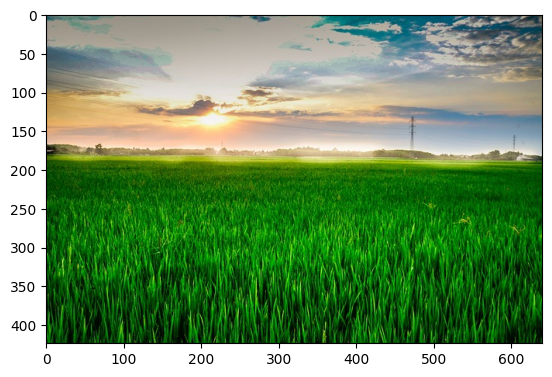

In [3]:
plt.imshow(rice_image)

In [4]:
print(rice_image)

[[[148 149 135]
  [147 148 134]
  [149 147 134]
  ...
  [ 61  72  78]
  [ 60  67  77]
  [ 63  67  79]]

 [[118 128 119]
  [121 131 122]
  [131 138 130]
  ...
  [ 57  66  71]
  [ 61  65  74]
  [ 65  68  77]]

 [[ 64  94  96]
  [ 69  97 100]
  [ 79 105 106]
  ...
  [ 69  74  77]
  [ 74  73  78]
  [ 78  76  81]]

 ...

 [[  0  51   0]
  [  0  70   0]
  [  5 110   5]
  ...
  [  0  29   0]
  [  0  44   0]
  [ 30  96  24]]

 [[  0  46   0]
  [  0  65   0]
  [  2 104   2]
  ...
  [  0  34   0]
  [  0  49   0]
  [ 34 102  27]]

 [[  0  45   0]
  [  0  65   0]
  [  1 103   1]
  ...
  [  0  37   0]
  [  0  54   0]
  [ 30  98  21]]]


# Accesing Pixels

In [5]:
#for accesing 3 channel pixel we need to load the image through OpenCV

rice_image = cv.imread("../input/rice-field/rice field.jpg")

#converting this into rgb
rice_image = cv.cvtColor(rice_image,cv.COLOR_BGR2RGB)
print(rice_image)

[[[148 149 135]
  [147 148 134]
  [149 147 134]
  ...
  [ 61  72  78]
  [ 60  67  77]
  [ 63  67  79]]

 [[118 128 119]
  [121 131 122]
  [131 138 130]
  ...
  [ 57  66  71]
  [ 61  65  74]
  [ 65  68  77]]

 [[ 64  94  96]
  [ 69  97 100]
  [ 79 105 106]
  ...
  [ 69  74  77]
  [ 74  73  78]
  [ 78  76  81]]

 ...

 [[  0  51   0]
  [  0  70   0]
  [  5 110   5]
  ...
  [  0  29   0]
  [  0  44   0]
  [ 30  96  24]]

 [[  0  46   0]
  [  0  65   0]
  [  2 104   2]
  ...
  [  0  34   0]
  [  0  49   0]
  [ 34 102  27]]

 [[  0  45   0]
  [  0  65   0]
  [  1 103   1]
  ...
  [  0  37   0]
  [  0  54   0]
  [ 30  98  21]]]


> red_channel = image_rgb[:, :, 0]  #0 corresponds to the Red channel
> Similarly, we can access the Green and Blue channels by replacing 0 with 1 and 2, respectively.

In [6]:
red_channel_pixel = rice_image[0,1,0]
print(red_channel_pixel)

147


In [7]:
green_channel_pixel = rice_image[0,1,1]
print(green_channel_pixel)

148


[[148 147 149 ...  61  60  63]
 [118 121 131 ...  57  61  65]
 [ 64  69  79 ...  69  74  78]
 ...
 [  0   0   5 ...   0   0  30]
 [  0   0   2 ...   0   0  34]
 [  0   0   1 ...   0   0  30]]
131


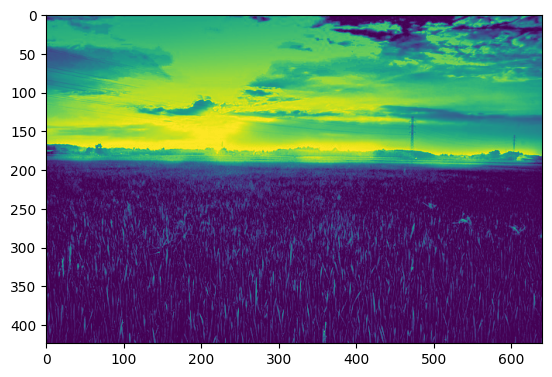

In [8]:
#we can access the pixel of different channel by splitting into different channel
r,g,b = cv.split(rice_image)
plt.imshow(r)
print(r)
print(r[1,2])

# Modifyning the pixel

[[148 147 149 ...  61  60  63]
 [118 121 131 ...  57  61  65]
 [ 64  69 255 ...  69  74  78]
 ...
 [  0   0   5 ...   0   0  30]
 [  0   0   2 ...   0   0  34]
 [  0   0   1 ...   0   0  30]]


(424, 640)

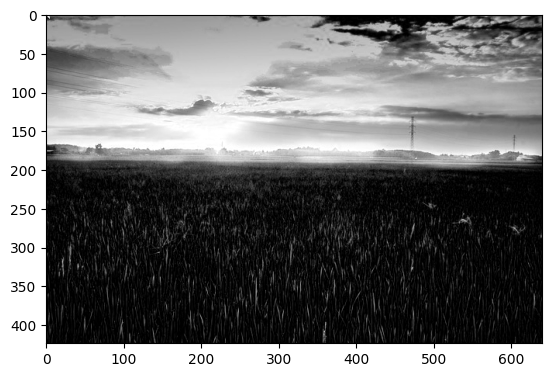

In [9]:
red_channel = r.copy()
red_channel[2, 2] = 255
red_channel[2, 3] = 255
red_channel[3, 2] = 255
red_channel[3, 3] = 255
red_channel[3, 4] = 255
red_channel[4, 3] = 255
red_channel[4, 4] = 255
red_channel[5, 4] = 255
print(red_channel)
plt.imshow(red_channel,cmap= 'gray')
red_channel.shape

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0 255 255   0   0]
 [  0   0 255 255 255   0]
 [  0   0   0 255 255   0]
 [  0   0   0   0 255   0]]


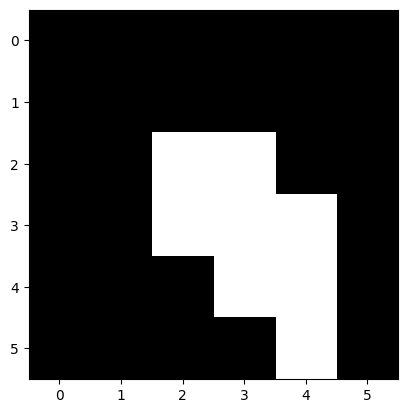

(6, 6)


In [10]:
#I'll create a dummy red_channel array here for demonstration
red_channel = np.zeros((6, 6), dtype=np.uint8)

# Modify certain pixel values as per your code
red_channel[2, 2] = 255
red_channel[2, 3] = 255
red_channel[3, 2] = 255
red_channel[3, 3] = 255
red_channel[3, 4] = 255
red_channel[4, 3] = 255
red_channel[4, 4] = 255
red_channel[5, 4] = 255

# Display the modified red channel
print(red_channel)
plt.imshow(red_channel, cmap='gray')
plt.show()

# Print the shape of the red channel
print(red_channel.shape)

# Image Cropping

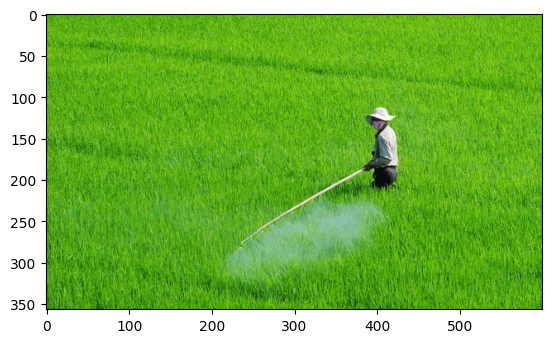

In [11]:
spray = cv.imread("../input/rice-field/spray.jpg")
spray = cv.cvtColor(spray,cv.COLOR_BGR2RGB)

plt.imshow(spray)

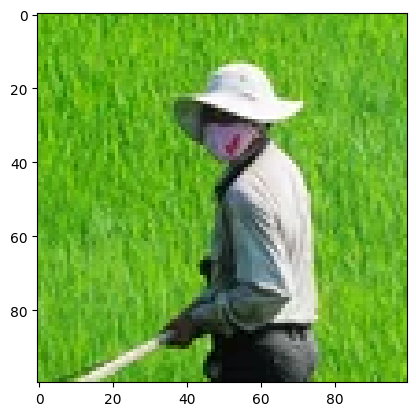

In [12]:
spray_img_cropping = spray[100:200 , 350:450]
plt.imshow(spray_img_cropping)

# Image Resizing

**Function Syntax :**
> dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )

* dst = Output image
* src = input image
* dsize = output image size
* fx: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜
* fy: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜


****Method 1****
Specifying exact size of the output image

In [13]:
desired_width = 150
desired_height = 200
dim = (desired_width,desired_height)

resized_spray_croppingimg = cv.resize (spray_img_cropping,dsize = dim , interpolation = cv.INTER_AREA)

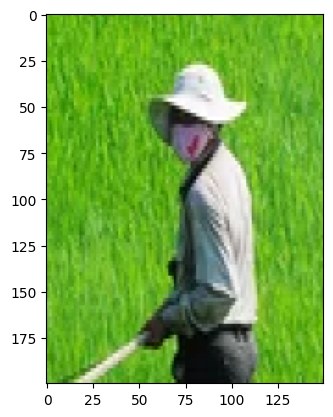

In [14]:
plt.imshow(resized_spray_croppingimg)

**Method 2:** Specifying Scaling Factor using fx and fy

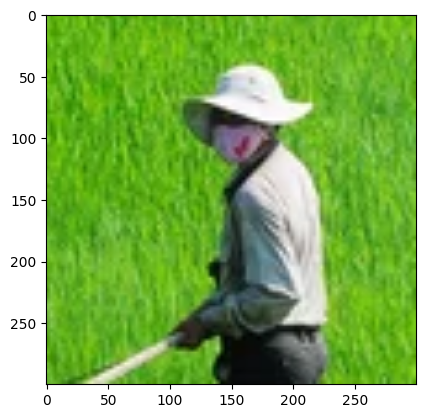

In [15]:
resized_cropped_region_3x = cv.resize(spray_img_cropping, None, fx=3, fy=3)
plt.imshow(resized_cropped_region_3x)

**Method 3:** Resize while maintaining aspect ratio

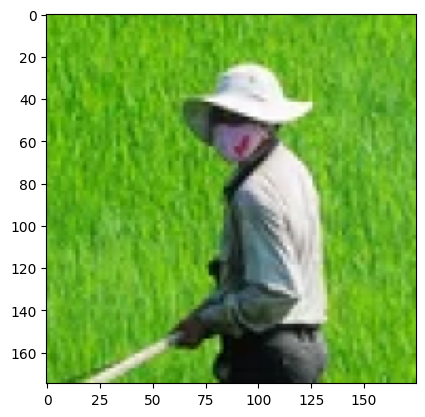

In [16]:
desired_width = 175
aspect_ratio = desired_width / spray_img_cropping.shape[1]
desired_height = int(spray_img_cropping.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_spray_region_ratio_maintain = cv.resize(spray_img_cropping, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_spray_region_ratio_maintain)

# Image Flipping

**Syntax :** dst = cv.flip( src, flipCode )

* dst: output array of the same size and type as src.

The function has 2 required arguments:

* src: input image
* flipCode: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

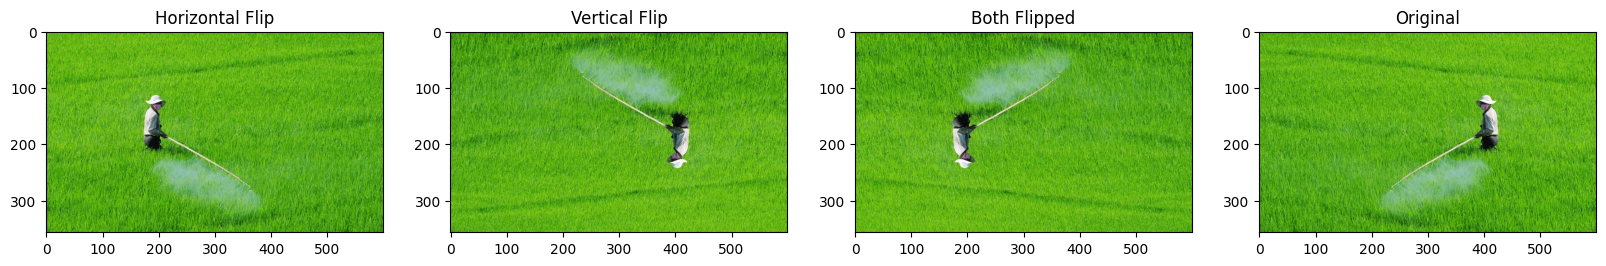

In [17]:
spray_img_flipped_horz = cv.flip(spray, 1)
spray_img_flipped_vert = cv.flip(spray, 0)
spray_img_flipped_both = cv.flip(spray, -1)

# Show the images
plt.figure(figsize=(20,6))
plt.subplot(141);plt.imshow(spray_img_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(spray_img_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(spray_img_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(spray);plt.title("Original");


# Thank You